# Beleg 1: GANs

## Hinweise zum Beleg:
- Das Bestehen des Belegs ist Voraussetzung zum Bestehen des Kurses. 
- Nutzen Sie soweit möglich die verimportierten Libraries zur Bearbeitung des 
- Geben Sie den Beleg als ipynb (in einem zip) ab - verzichten Sie auf eine Abgabe der Daten aber halten Sie bitte die in Aufgabe 1 geforderte Struktur ein.
- Tragen Sie bitte Ihren Namen und Matrikelnummer oben ein

## Inhalt
In diesem Beleg wollen wir das Training eines GANs nachvollziehen. Er basiert zu großen Teilen auf dem Beispiel aus *Dive into Deep Learning* Kapitel 20.2.

Grundlage des Belegs ist das pokemon dataset, welches Sprites der Animation einzelner Pokemon aus den Pokemon Spielen enhält. Ziel ist es auf diesen (bzw. einem Teil von diesen) Daten zu trainieren um künstliche Bilder von Pokemon erzeugen zu können. Lernzeil soll hierbei sein, ein Verständnis zu erhalten für:

- Grundlagen zur Datensatz Erzeugung
- Grundlagen zur Implementierung von CNNs mit pytorch
- Grundlagen zur Umsetztung eines GAN Trainings
- Ablauf (z.B. Laufzeit) sowie für die zu erwartenden Resultate eines GANs Training
- Grundlagen zum Erzeugen von Bildern mit einem trainierten Modell 

In [1]:
# Grundlegenden Importe: erweitern Sie diese falls nötig
import torch
import torchvision
from torch import nn

from torch.utils.benchmark import Timer

import matplotlib.pyplot as plt
import os
import shutil

**Aufgabe 1: Datensatz** 

**Aufgabe 1.1**
Laden Sie sich den Pokemon Datensatz unter http://d2l-data.s3-accelerate.amazonaws.com/pokemon.zip (bereitgestellt durch *Dive into Deep Learning*) herunter, und entpacken Sie ihn. Erstellen Sie sich hierfür ein Verzeichnis von der Struktur

Beleg 1<br>
|--data<br>
|--|--pokemon<br>
|--code<br>
|--|--Belege1.ipynb<br>

# **Aufgabe 1.2**
Die Bilder des Datensatzes liegen nach Pokemon sortiert in mit dem PokemonIndex bezeichneten Verzeichnissen. Die Bilder selbst sind nach dem Schema "PokemonIndex_Index.png" benannt.

Je nach vorhandener Hardware ist der Datensatz zu gross und muss verkleinert werden.

Implementieren Sie hierzu eine Routine welche einen Liste an PokemonIndizes und eine Liste an sprite Indizes erhält und einen neuen Ordner *pokemon_small* im *data*-Verzeichnis erzeugt und hierbei nur eine übergebene Auswahl von Pokemon und Sprites speichert. 

Hinweis: Sie können hierfür z.B. die folgenden Funktionen nutzen: 
- os.makedirs (erzeugt einen Verzeichnisbaum) 
- os.mkdir (erzeugt ein Verzeichnis) 
- os.listdir (listet den Inhalt eines Verzeichnisses auf) 
- os.path.join (verkünpft Strings zu einem Pfad) 
- os.path.exists (prüft ob ein Pfad aktuell existiert) 
- shutil.copyfile (kopiert eine Datei)

sowie dass die Abfrage *element **in** list* einen Boolean liefert, welcher angibt, ob das Element element in der Liste list ist.

In [2]:
# Lösung von Aufgabe 1.2

input_dir = "../data/pokemon" # Verzeichnis in dem die Original-Daten liegen
data_dir = "../data/pokemon_small" # Zu erstellendes Verzeichnis

def create_dataset(list_of_pokemon_indices, list_of_sprite_indices, number_of_pokemons, number_of_sprites_per_pokemon):
    list_of_pokemons = list_of_pokemon_indices[:number_of_pokemons]
    list_of_sprites = []
    for pokemon in list_of_pokemons:
        for sprite in range(0, number_of_sprites_per_pokemon):
            try:
                elem = pokemon+"-"+str(sprite)+'.png'
                index = list_of_sprite_indices.index(elem)
                list_of_sprites.append(list_of_sprite_indices[index])
            except ValueError as ve:
                print(str(elem, "not found"))
                
    # create dirs
    for pokemon in list_of_pokemons:
        pokemon_dir_path = data_dir +'/' + pokemon
        os.mkdir(pokemon_dir_path)
        sprites_path = input_dir +'/'+ pokemon
        new_sprites_path = os.path.join(data_dir, pokemon)
        
        for sprite in list_of_sprites:
            pokemon_of_sprite = sprite.split('-')[0]
            if pokemon_of_sprite == pokemon:
                shutil.copyfile(str(sprites_path + '/' + sprite), str(new_sprites_path + "/" + sprite))        

def main():
    
    # liste von Pokemon Indizes bzw. nummerierung der Ordner
    list_of_pokemon_indices = os.listdir(input_dir)

    # Liste an sprite Indizes
    list_of_sprite_indices = []

    for pokemon_folder_index in list_of_pokemon_indices:
        list_of_pokemon_sprites = os.listdir(os.path.join(input_dir, pokemon_folder_index))
        for sprite in list_of_pokemon_sprites:
            list_of_sprite_indices.append(sprite)

    number_of_pokemons = 5
    number_of_sprites_per_pokemon = 15
    
    # check if folder pokemon_small exists
    if os.path.exists(data_dir) == False:
        # create
        os.mkdir(data_dir)
        create_dataset(list_of_pokemon_indices, list_of_sprite_indices, number_of_pokemons,number_of_sprites_per_pokemon)
        print("success")
    else:
        print("Folder already exists")
        print("Deleting folder...")
        shutil.rmtree(data_dir)
        print("folder deleted, retrying")
        main()
        

main()


Folder already exists
Deleting folder...
folder deleted, retrying
success


**Aufgabe 1.3**
- Nutzen Sie die Funktion *torchvision.datasets.ImageFolder* um aus dem Verzeichnis *pokemon_small* einen Datensatz zu erzeugen.

- Nutzen Sie dann die unten Transformation und BatchSize um einen DataLoader mit dem Namen data_iter mittels der Funktion *torch.utils.data.DataLoader* zu erstellen (inklusive shuffle der Daten)

- Ziehen Sie einen Batch aus dem Datensatz, untersuchen Sie die Rückgabewerte und stellen Sie ersten 20 Bilder des Batches z.B. mittels der Funktion *pyplot.imshow* dar


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

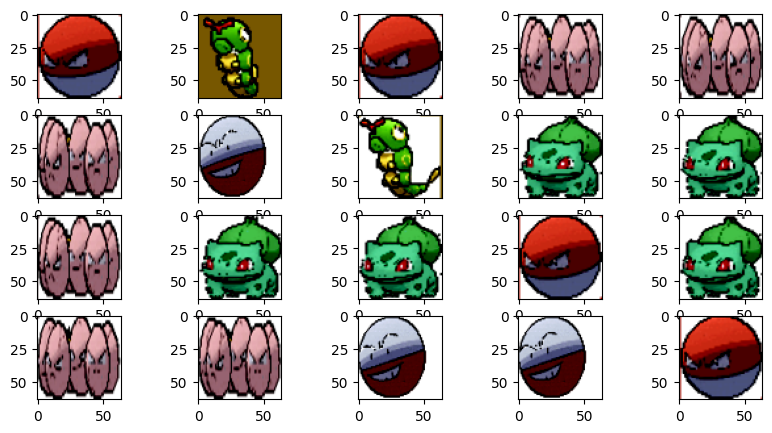

In [3]:
batch_size = 75
transformer = torchvision.transforms.Compose([
    torchvision.transforms.Resize((64, 64)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5)
])

dataset = torchvision.datasets.ImageFolder(data_dir)

dataset.transform = transformer

data_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

# Einen Batch aus dem DataLoader erstellen
batch = next(iter(data_iter))

# Den erstellten Batch verwenden
inputs, labels = batch

# Die ersten 20 Bilder aus dem Batch nehmen
images = batch[0][:20]

fig = plt.figure(figsize=(10, 5))
columns = 5
rows = 4

for i in range(1, columns * rows + 1):
    img = images[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.permute(1,2,0))
    
plt.show()


**Aufgabe 2: Aufbau der Netzwerke**

**Aufgabe 2.1:**
Unten finden Sie den Konstruktor (die \_\_init\_\_ Funktion) für einen Block des Generators (G_block) und des Diskriminators (D_block). Diese Bestehen aus einer Conv2d bzw ConvTranspose2d Schicht gefolgt von batch_normalization und einer ReLU / LeakyReLU activation. 
- Implementieren Sie in beiden Fällen die forward Funktion. 
- Erzeugen Sie für beide Fälle einen Beispielblock und zufälligen Beispielinput und erzeugen Sie den zugehörigen Output. Geben Sie die Dimensionen des Outputs aus.

In [4]:
class G_block(nn.Module):
    def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2,
                 padding=1, **kwargs):
        super(G_block, self).__init__(**kwargs)
        
        
        self.conv2d_trans = nn.ConvTranspose2d(in_channels, out_channels,
                                kernel_size, strides, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))
        
    
class D_block(nn.Module):
    def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2,
                padding=1, alpha=0.2, **kwargs):
        super(D_block, self).__init__(**kwargs)
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size,
                                strides, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.LeakyReLU(alpha, inplace=True)

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d(X)))
        

**Aufgabe 2.2**:

Unten finden Sie den Code für das Generatornetzwerk. Es verarbeitet einen Input der Form (BatchDim, LatentDim, 1, 1) in einen Output der Form (3, 64, 64) welchen wir als 64x64 RGB Bild interpretieren werden. Der Output hat Werte zwischen -1 und 1.

Erstellen Sie ein entsprechendes Netzwerk für den Diskriminator, welches analog aus 4 D_block Schichten besteht. Als Input erhält dieses ein (BatchDim, 3, 64, 64) Tensor und die Anzahl der Kanäle sollen von 3 auf 64, auf 2*64, 4*64 und 8*64 erhöht werden, wobei die Dimension durch die default Einstellung des D_blocks auf 4,4 reduziert wird. Wenden Sie eine finale Conv2d Schicht ohne Bias mit Kernelsize 4 und einem Output-Kanal an um einen Output der Dimension (BatchDim,1,1,1) zu erzeugen.

In [5]:
n_G = 64
net_G = nn.Sequential(
    G_block(in_channels=100, out_channels=n_G*8,
            strides=1, padding=0),                  # Output: (64 * 8, 4, 4)
    G_block(in_channels=n_G*8, out_channels=n_G*4), # Output: (64 * 4, 8, 8)
    G_block(in_channels=n_G*4, out_channels=n_G*2), # Output: (64 * 2, 16, 16)
    G_block(in_channels=n_G*2, out_channels=n_G),   # Output: (64, 32, 32)
    nn.ConvTranspose2d(in_channels=n_G, out_channels=3,
                       kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh())  # Output: (3, 64, 64)

In [6]:
n_D = 64
net_D = nn.Sequential(
    D_block(n_D),
    D_block(in_channels=n_D, out_channels=n_D*2),
    D_block(in_channels=n_D*2, out_channels=n_D*4),
    D_block(in_channels=n_D*4, out_channels=n_D*8),
    nn.Conv2d(in_channels=n_D*8, out_channels=1,
              kernel_size=4, bias=False))   

**Aufgabe 2.3**
Unten finden Sie die Funktionen update_D und update_G welche die übergebenen Netzwerke net_D und net_G für einen übergebenen Daten-Batch updaten (mittels der backward und step Routinen).

- Vollziehen Sie die Implementierung der Funktionen nach - beachten Sie insbesondere welche Netzwerke in welcher Funktion geupdated werden und wie weit der Computational Graph reicht, also welche Parameter von einem Update betroffen sein werden.

Darunter finden Sie den Beginn der Trainingsschliefe - hier sind bereits die Netzwerke initialisiert sowie die Optimier (in diesem Fall die Adam Methode) definiert. Implementieren Sie das Training zu Ende, d.h.

- Schreiben Sie eine Schleife über den Datensatz mit Hilfe des DataLoaders von oben (ein Durchlauf dieser Schleife ist dann eine Epoche)
- Erzeugen Sie für jeden Batch von realen Bildern einen zugehörigen Input für den Generator mit normalverteilten Zufallseinträgen
- Updaten Sie für jeden Batch den Diskriminator und den Generator 
- Sammeln Sie den Gesamtloss für beide für die laufende Epoche
- Erzeugen Sie am Ende der Epoche Beispielbilder mit dem aktuellen Generator und Stellen Sie diese dar um den Lernfortschritt einschätzen zu können
- Stellen Sie am Ende des Trainings den Generator- und den Diskriminatorloss dar
- Experimentieren Sie mit der Größe des Datensatzes (Anzahl an verschiedenen Pokemon und Sprites), Parametern wie der Lernrate und Epochenzahl (lr und num_epochs) sowie weiteren Parametern Ihrer Wahl und beobatchten Sie das Training (z.B. Laufzeit / erhaltende Bilder / Losskurven) - protokollieren Sie Ihre Erkenntnisse grob.

In [7]:
def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """
    Method for updating the discriminator.
    
    Parameter:
    X - Batch of real images - shape (BatchDim,3,64,64)
    Z - Batch of seeds for the generator - shape (BatchDim,LatentDim,1,1)
    net_D - discriminator network
    net_G - generator network
    loss - total GAN Loss function
    trainer_D - optimizer for the net_D parameters
    
    Returns:
    torch.tensor - discriminator loss
    """
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # Do not need to compute gradient for `net_G`, detach it from
    # computing gradients.
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

def update_G(Z, net_D, net_G, loss, trainer_G):
    """
    Method for updating the discriminator.
    
    Parameter:
    Z - Batch of seeds for the generator - shape (BatchDim,LatentDim,1,1)
    net_D - discriminator network
    net_G - generator network
    loss - total GAN Loss function
    trainer_G - optimizer for the net_G parameters
    
    Returns:
    torch.tensor - generator loss
    """
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # We could reuse `fake_X` from `update_D` to save computation
    fake_X = net_G(Z)
    # Recomputing `fake_Y` is needed since `net_D` is changed
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

def train(net_D, net_G, data_iter, num_epochs, lr, latent_dim, device='cpu'):
    """
    Main training loop

    Parameters:
    net_D - discriminator network
    net_G - generator network
    data_iter - DataLoader for the data
    num_epochs - Number of epochs
    lr - learning rate of the training
    latent_dim - LatentDim: Input dimension to the generator
    device - device used for the computation; default is 'cpu'

    Returns:
    None
    """
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
        
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
        
    net_D, net_G = net_D.to(device), net_G.to(device)
    
    trainer_hp = {'lr': lr, 'betas': [0.5,0.999]}
    trainer_D = torch.optim.Adam(net_D.parameters(), **trainer_hp)
    trainer_G = torch.optim.Adam(net_G.parameters(), **trainer_hp)
    
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.axis('off')
    #plt.show(block=False)
    
    losses = [[],[]]

     # Create lists to store loss values
    loss_D_list = []
    loss_G_list = []
    
    # Training loop
    for epoch in range(1, num_epochs + 1):
        loss_D_sum = 0.0
        loss_G_sum = 0.0
        for batch_real, _ in data_iter:
            batch_size = batch_real.size(0)

            Z = torch.normal(0, 1, size=(batch_size, latent_dim, 1, 1))
            
            batch_real, Z = batch_real.to(device), Z.to(device)
            
            loss_D = update_D(batch_real, Z, net_D, net_G, loss, trainer_D)
            loss_G = update_G(Z, net_D, net_G, loss, trainer_G)
            
            # generated examples
            Z = torch.normal(0, 1, size=(21, latent_dim, 1, 1), device=device)
            # normalize synthetic data
            fake_x = net_G(Z).permute(0, 2, 3, 1) / 2 + 0.5
            imgs = torch.cat([torch.cat([fake_x[i * 7 + j].cpu().detach() for j in range(7)], dim=1) 
                              for i in range(len(fake_x)//7)], dim=0)
            
            plt.imshow(imgs)
            plt.axis('off')
            plt.show()
        
            loss_D_sum += loss_D.item()
            loss_G_sum += loss_G.item()

        loss_D_avg = loss_D_sum / len(data_iter)
        loss_G_avg = loss_G_sum / len(data_iter)

        loss_D_list.append(loss_D_avg)
        loss_G_list.append(loss_G_avg)
            
        print(f"Epoch [{epoch}/{num_epochs}], Discriminator Loss: {loss_D:.4f}, Generator Loss: {loss_G:.4f}")
                
    # Return the loss lists
    epochs = range(1, num_epochs + 1)
    # Plot the losses
    plt.plot(epochs, loss_D_list, label='Discriminator Loss')
    plt.plot(epochs, loss_G_list, label='Generator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    
    

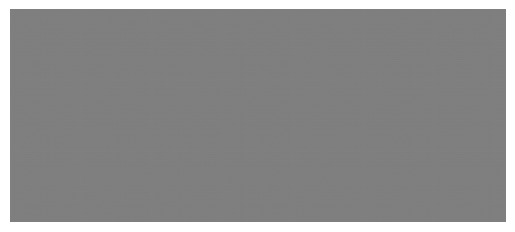

Epoch [1/150], Discriminator Loss: 52.0003, Generator Loss: 76.2512


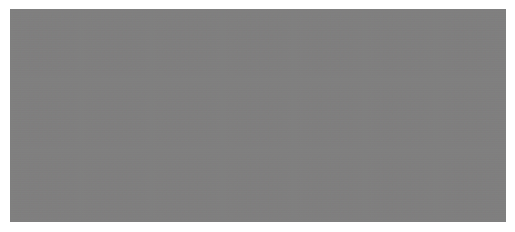

Epoch [2/150], Discriminator Loss: 47.6653, Generator Loss: 44.7039


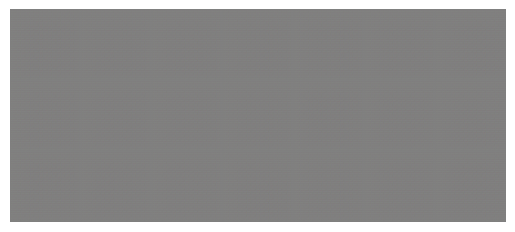

Epoch [3/150], Discriminator Loss: 58.6418, Generator Loss: 74.8471


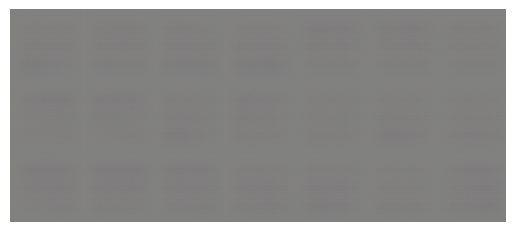

Epoch [4/150], Discriminator Loss: 45.8177, Generator Loss: 80.1670


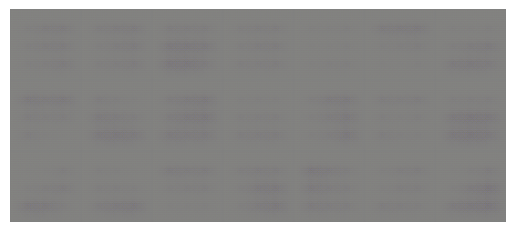

Epoch [5/150], Discriminator Loss: 37.6082, Generator Loss: 109.7213


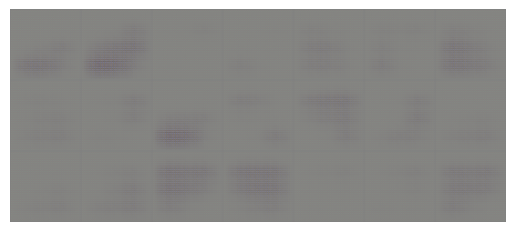

Epoch [6/150], Discriminator Loss: 25.1024, Generator Loss: 133.6698


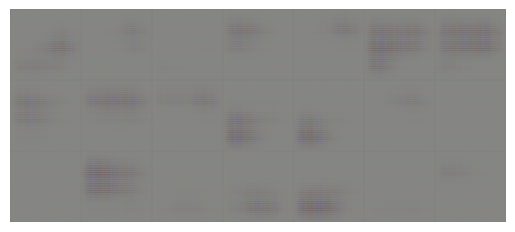

Epoch [7/150], Discriminator Loss: 29.5448, Generator Loss: 181.2652


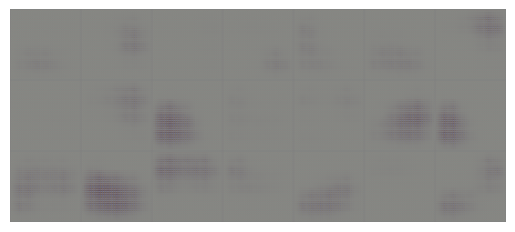

Epoch [8/150], Discriminator Loss: 61.5044, Generator Loss: 77.0711


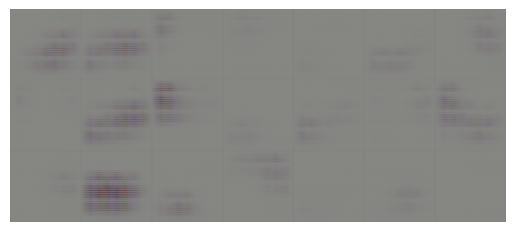

Epoch [9/150], Discriminator Loss: 26.5071, Generator Loss: 87.5426


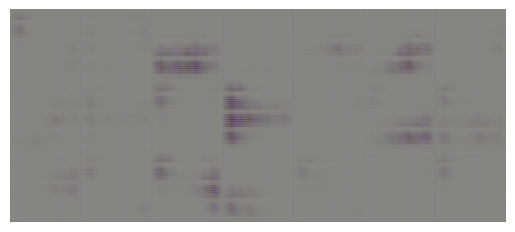

Epoch [10/150], Discriminator Loss: 23.5514, Generator Loss: 117.7283


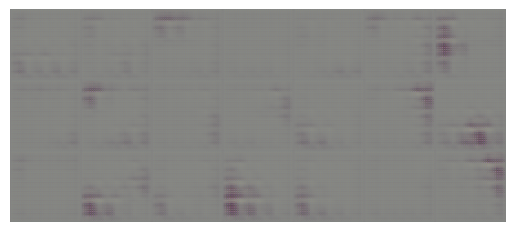

Epoch [11/150], Discriminator Loss: 16.6110, Generator Loss: 160.9644


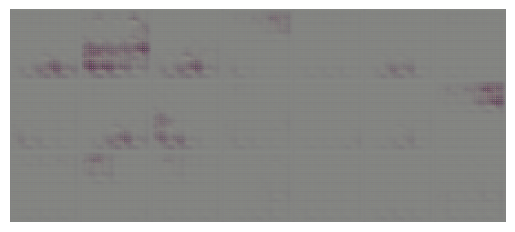

Epoch [12/150], Discriminator Loss: 14.6301, Generator Loss: 219.0510


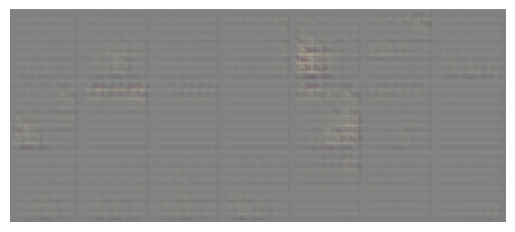

Epoch [13/150], Discriminator Loss: 11.1505, Generator Loss: 209.7057


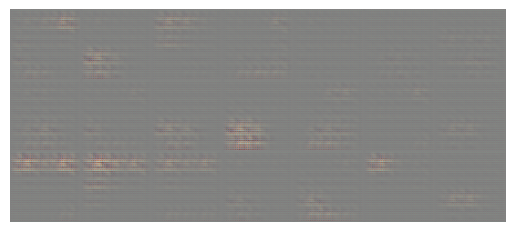

Epoch [14/150], Discriminator Loss: 48.3815, Generator Loss: 241.2829


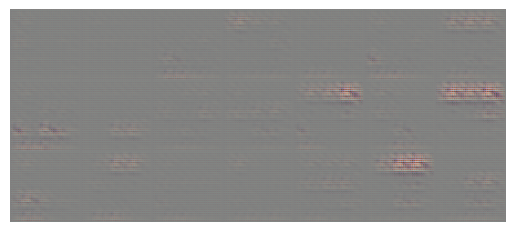

Epoch [15/150], Discriminator Loss: 30.7710, Generator Loss: 169.5458


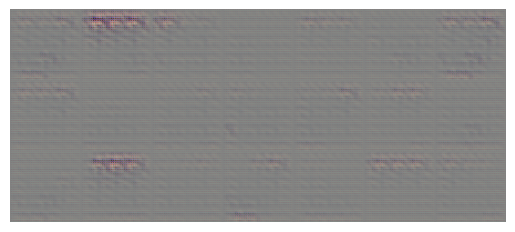

Epoch [16/150], Discriminator Loss: 24.9369, Generator Loss: 146.9260


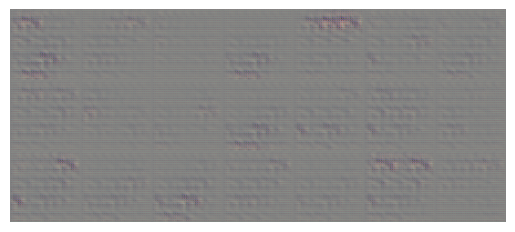

Epoch [17/150], Discriminator Loss: 27.0509, Generator Loss: 212.1139


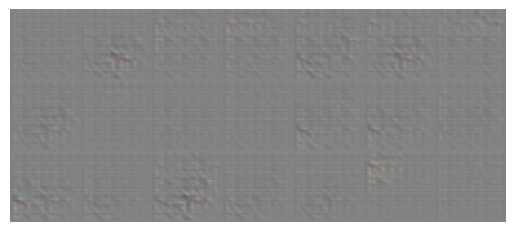

Epoch [18/150], Discriminator Loss: 16.4622, Generator Loss: 191.7837


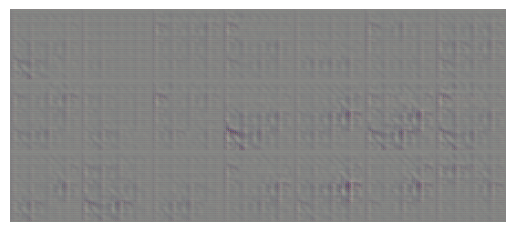

Epoch [19/150], Discriminator Loss: 28.0217, Generator Loss: 247.8016


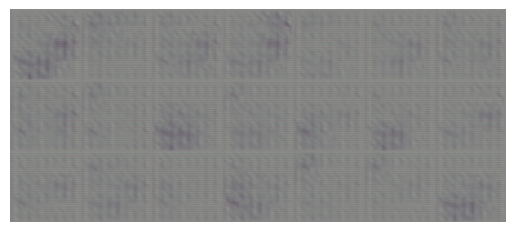

Epoch [20/150], Discriminator Loss: 38.3242, Generator Loss: 121.0456


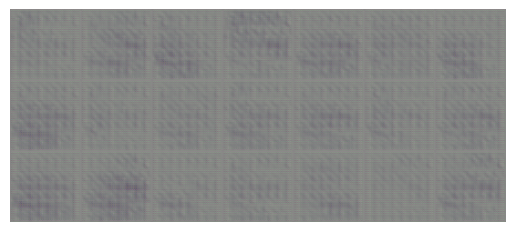

Epoch [21/150], Discriminator Loss: 69.4744, Generator Loss: 251.0938


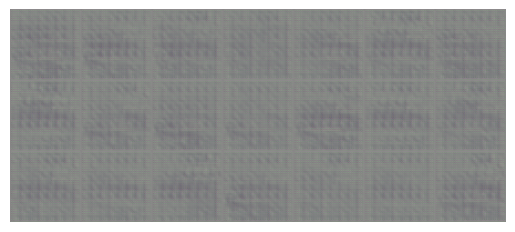

Epoch [22/150], Discriminator Loss: 75.6076, Generator Loss: 118.4417


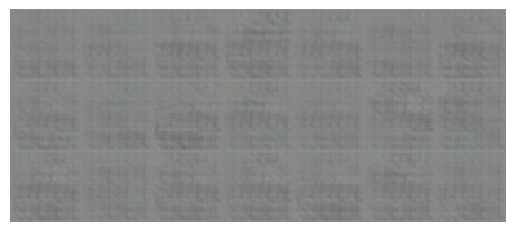

Epoch [23/150], Discriminator Loss: 41.4673, Generator Loss: 95.9301


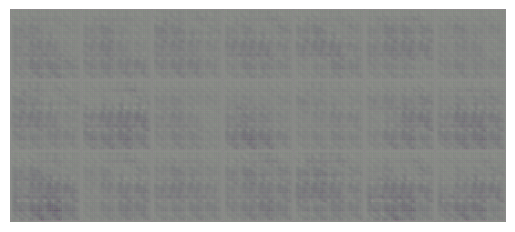

Epoch [24/150], Discriminator Loss: 41.7204, Generator Loss: 194.2860


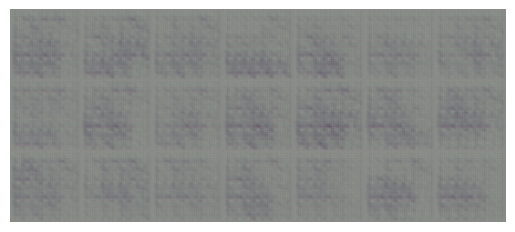

Epoch [25/150], Discriminator Loss: 27.1375, Generator Loss: 163.9880


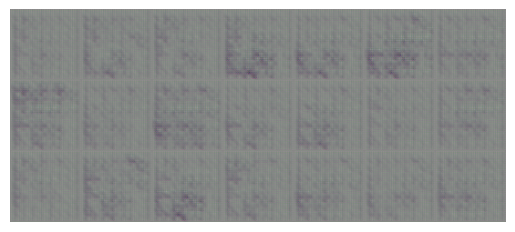

Epoch [26/150], Discriminator Loss: 30.2947, Generator Loss: 171.0658


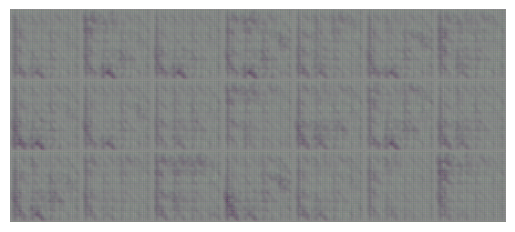

Epoch [27/150], Discriminator Loss: 32.8029, Generator Loss: 185.9049


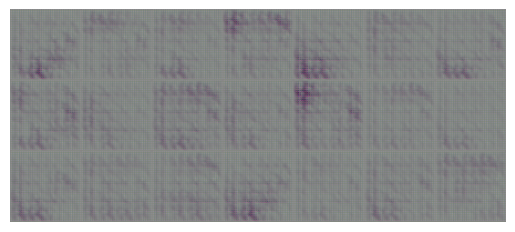

Epoch [28/150], Discriminator Loss: 25.3243, Generator Loss: 267.9201


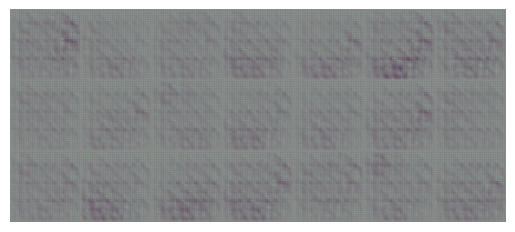

Epoch [29/150], Discriminator Loss: 17.8911, Generator Loss: 213.8551


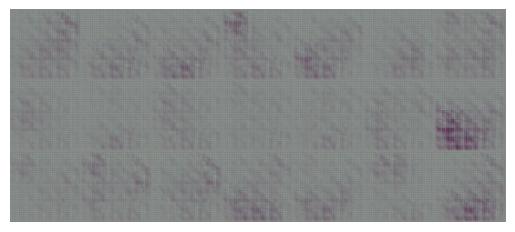

Epoch [30/150], Discriminator Loss: 43.8503, Generator Loss: 345.1747


KeyboardInterrupt: 

In [8]:
latent_dim, lr, num_epochs = 100, 0.004, 150
train(net_D, net_G, data_iter, num_epochs, lr, latent_dim)

